# DATR-406 Final Project
## Exploratory Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
ACS_PATH = './data/acs_features.csv'
NCHS_PATH = './data/raw/NCHSURCodes2013.xlsx'
RATES_PATH = './data/raw/participationrates2010.txt'

### Step 1: Build combined dataset

In [3]:
# NCHS Urbanity Data
nchs = pd.read_excel(NCHS_PATH)
nchs.rename({'FIPS code': 'geoid', 'State Abr.': 'state', '2013 code': 'urbanity'}, axis='columns', inplace=True)
nchs = nchs[['geoid', 'state', 'urbanity']]
nchs['geoid'] = '_' + nchs['geoid'].astype(str).str.zfill(5)
urban_codes = {1: 'large_central_metro', 2: 'large_fringe_metro', 3: 'medium_metro', 4: 'small_metro', 5: 'micropolitan', 6: 'non_core'}
nchs['urbanity'] = nchs['urbanity'].map(urban_codes)

print('nchs data: {}'.format(nchs.shape))
display(nchs.isnull().sum())
display(nchs.head())

nchs data: (3149, 3)


geoid       0
state       0
urbanity    0
dtype: int64

,geoid,state,urbanity
0,_01001,AL,medium_metro
1,_01003,AL,small_metro
2,_01005,AL,non_core
3,_01007,AL,large_fringe_metro
4,_01009,AL,large_fringe_metro


In [4]:
# 2010 Participates Rates from Census
rates = pd.read_csv(RATES_PATH, sep=' \|\|', header=None)
rates.dropna(axis=1, how='all', inplace=True)
rates.columns = ['geoid', 'name', 'level', 'rate_2000', 'rate_2010']
rates = rates.loc[rates['geoid'].astype(str).str.len() == 5, ['geoid', 'rate_2010']]
rates['geoid'] = '_' + rates['geoid'].astype(str)
rates.sort_values('geoid', inplace=True)

display(rates.shape)
display(rates.head())

(3190, 2)

,geoid,rate_2010
2288,_01001,0.78
2915,_01003,0.73
1701,_01005,0.63
1354,_01007,0.58
2347,_01009,0.80


In [5]:
# ACS Data (prepped in previous notebook)
acs = pd.read_csv(ACS_PATH)

display(acs.shape)
display(acs.head())

(3221, 49)

,state,geoid,name,total_pop,total_hholds,speak_only_english,educ_less_than_hs,educ_hs_grad,educ_some_college,educ_college_grad,...,traveltowork_public_transit,commutetime_u10,commutetime_10_30,commutetime_30_60,commute_time_60_90,commutetime_90_plus,structure_year_built_median,worktype_for_profit,worktype_non_profit,worktype_government
0,AL,_01001,"Autauga County, Alabama",4560.0,1872.0,0.963341,0.149639,0.346500,0.285487,0.145762,...,0.002800,0.107418,0.496322,0.363294,0.024130,0.008836,1987.0,0.949808,0.897779,4.097785
1,AL,_01003,"Baldwin County, Alabama",10722.0,5295.0,0.954008,0.125387,0.297702,0.310638,0.174735,...,0.002856,0.146317,0.478874,0.305744,0.047125,0.021941,1992.0,0.960238,1.001244,4.400801
2,AL,_01005,"Barbour County, Alabama",2479.0,1102.0,0.957571,0.297408,0.362488,0.216462,0.070689,...,0.003046,0.218156,0.464160,0.248417,0.043229,0.026038,1980.0,0.981499,0.744973,4.026826
3,AL,_01007,"Bibb County, Alabama",1348.0,579.0,0.986223,0.278418,0.398095,0.212575,0.078887,...,0.006518,0.102422,0.335640,0.464821,0.065859,0.031257,1980.0,0.954205,1.082663,3.319749
4,AL,_01009,"Blount County, Alabama",4389.0,1875.0,0.931554,0.271340,0.364759,0.240747,0.082580,...,0.000664,0.107459,0.294507,0.458859,0.108485,0.030690,1983.0,0.997175,0.976652,4.134266


In [6]:
# combined
data = pd.merge(rates, nchs, how='left')
data = pd.merge(data, acs, how='left')

data.to_csv('data/combined_data.csv', index=False)

display(data.shape)
display(data.columns)
display(data.head())

(3190, 51)

Index(['geoid', 'rate_2010', 'state', 'urbanity', 'name', 'total_pop',
       'total_hholds', 'speak_only_english', 'educ_less_than_hs',
       'educ_hs_grad', 'educ_some_college', 'educ_college_grad',
       'educ_post_grad', 'income_u10k', 'income_10k_to_u15k',
       'income_15k_to_u25k', 'income_25k_to_u35k', 'income_35k_to_u50k',
       'income_50k_to_u65k', 'income_65k_to_u75k', 'income_75k_or_more',
       'marital_never_married', 'livinginarea_1_to_4', 'livinginarea_5_to_17',
       'livinginarea_18_to_19', 'livinginarea_20_to_49',
       'livinginarea_50_plus', 'citizenship_non_citizen',
       'incomepovertyratio_u1', 'incomepovertyratio_1_to_2',
       'incomepovertyratio_2_plus', 'hh_with_earnings', 'employ_employed',
       'employ_unemployed', 'B19083_001', 'hhtype_married_couple',
       'hhtype_m_householder', 'hhtype_f_householder', 'hhtype_living_alone',
       'traveltowork_drove_alone', 'traveltowork_carpooled',
       'traveltowork_public_transit', 'commutetime_u10

,geoid,rate_2010,state,urbanity,name,total_pop,total_hholds,speak_only_english,educ_less_than_hs,educ_hs_grad,...,traveltowork_public_transit,commutetime_u10,commutetime_10_30,commutetime_30_60,commute_time_60_90,commutetime_90_plus,structure_year_built_median,worktype_for_profit,worktype_non_profit,worktype_government
0,_01001,0.78,AL,medium_metro,"Autauga County, Alabama",4560.0,1872.0,0.963341,0.149639,0.346500,...,0.002800,0.107418,0.496322,0.363294,0.024130,0.008836,1987.0,0.949808,0.897779,4.097785
1,_01003,0.73,AL,small_metro,"Baldwin County, Alabama",10722.0,5295.0,0.954008,0.125387,0.297702,...,0.002856,0.146317,0.478874,0.305744,0.047125,0.021941,1992.0,0.960238,1.001244,4.400801
2,_01005,0.63,AL,non_core,"Barbour County, Alabama",2479.0,1102.0,0.957571,0.297408,0.362488,...,0.003046,0.218156,0.464160,0.248417,0.043229,0.026038,1980.0,0.981499,0.744973,4.026826
3,_01007,0.58,AL,large_fringe_metro,"Bibb County, Alabama",1348.0,579.0,0.986223,0.278418,0.398095,...,0.006518,0.102422,0.335640,0.464821,0.065859,0.031257,1980.0,0.954205,1.082663,3.319749
4,_01009,0.80,AL,large_fringe_metro,"Blount County, Alabama",4389.0,1875.0,0.931554,0.271340,0.364759,...,0.000664,0.107459,0.294507,0.458859,0.108485,0.030690,1983.0,0.997175,0.976652,4.134266


### Step 2: Check For Missing Data

In [7]:
display(data.isnull().sum())

display(data.loc[data['state'].isnull(), :].head())

display(data.loc[data['state'].isnull(), 'geoid'].str[1:3].value_counts())

geoid                           0
rate_2010                       0
state                          78
urbanity                       78
name                           78
total_pop                      78
total_hholds                   78
speak_only_english             78
educ_less_than_hs              78
educ_hs_grad                   78
educ_some_college              78
educ_college_grad              78
educ_post_grad                 78
income_u10k                    78
income_10k_to_u15k             78
income_15k_to_u25k             78
income_25k_to_u35k             78
income_35k_to_u50k             78
income_50k_to_u65k             78
income_65k_to_u75k             78
income_75k_or_more             78
marital_never_married          78
livinginarea_1_to_4            82
livinginarea_5_to_17           82
livinginarea_18_to_19          82
livinginarea_20_to_49          82
livinginarea_50_plus           82
citizenship_non_citizen        78
incomepovertyratio_u1          79
incomepovertyr

,geoid,rate_2010,state,urbanity,name,total_pop,total_hholds,speak_only_english,educ_less_than_hs,educ_hs_grad,...,traveltowork_public_transit,commutetime_u10,commutetime_10_30,commutetime_30_60,commute_time_60_90,commutetime_90_plus,structure_year_built_median,worktype_for_profit,worktype_non_profit,worktype_government
3112,_72001,0.59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3113,_72003,0.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3114,_72005,0.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3115,_72007,0.48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3116,_72009,0.61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


72    78
Name: geoid, dtype: int64

Geoid's that start with 72 (Puerto Rico) appear to be missing most variables.  This is probably because the ACS stores data for Puerto Rico separately from the 50 states and DC.  I'm dropping rows that are missing all ACS variables.

In [8]:
cols = list(data.columns)[2:]
data.dropna(how='all', subset=cols, inplace=True)
display(data.isnull().sum())

geoid                          0
rate_2010                      0
state                          0
urbanity                       0
name                           0
total_pop                      0
total_hholds                   0
speak_only_english             0
educ_less_than_hs              0
educ_hs_grad                   0
educ_some_college              0
educ_college_grad              0
educ_post_grad                 0
income_u10k                    0
income_10k_to_u15k             0
income_15k_to_u25k             0
income_25k_to_u35k             0
income_35k_to_u50k             0
income_50k_to_u65k             0
income_65k_to_u75k             0
income_75k_or_more             0
marital_never_married          0
livinginarea_1_to_4            4
livinginarea_5_to_17           4
livinginarea_18_to_19          4
livinginarea_20_to_49          4
livinginarea_50_plus           4
citizenship_non_citizen        0
incomepovertyratio_u1          1
incomepovertyratio_1_to_2      1
incomepove

In [9]:
data['num_nulls'] = data.isnull().sum(axis=1)
display(data.loc[data['num_nulls'] > 0, :])

,geoid,rate_2010,state,urbanity,name,total_pop,total_hholds,speak_only_english,educ_less_than_hs,educ_hs_grad,...,commutetime_u10,commutetime_10_30,commutetime_30_60,commute_time_60_90,commutetime_90_plus,structure_year_built_median,worktype_for_profit,worktype_non_profit,worktype_government,num_nulls
541,_15005,0.00,HI,small_metro,"Kalawao County, Hawaii",16.0,32.0,0.846154,0.166667,0.128205,...,0.861538,0.138462,0.000000,0.000000,0.000000,1939.0,0.343700,0.0,2.044420,8
2634,_48261,0.40,TX,micropolitan,"Kenedy County, Texas",46.0,71.0,0.404908,0.345550,0.115183,...,0.036697,0.908257,0.055046,0.000000,0.000000,1970.0,0.812102,0.0,1.110089,5
2638,_48269,0.43,TX,non_core,"King County, Texas",47.0,46.0,0.977876,0.114943,0.275862,...,0.928571,0.053571,0.017857,0.000000,0.000000,1967.0,0.918348,0.0,2.439321,5
2654,_48301,0.61,TX,non_core,"Loving County, Texas",15.0,16.0,1.000000,0.025974,0.506494,...,0.623188,0.000000,0.231884,0.057971,0.086957,1974.0,1.000000,0.0,0.851242,5


After removing the rows without ACS data there are very few missing values relative to the approximately 3100 cases overall.  Additionally, each of these counties has a population of less than 50.  So I'm comfortable dropping them as it is unlikely to affect the analysis or model.

In [10]:
has_nulls = data['num_nulls'] > 0
data.drop(data[has_nulls].index, axis=0, inplace=True)
data.isnull().sum()
data.drop('num_nulls', axis=1, inplace=True)
display(data.shape)

(3108, 51)

In [11]:
data.to_csv('data/combined_data.csv', index=False)

### Step 3: Exploratory Data Analysis

In [12]:
pd.options.display.float_format = '{:.3f}'.format
display(data.describe().transpose())
display(data.select_dtypes(include='object').describe().transpose())

,count,mean,std,min,25%,50%,75%,max
rate_2010,3108.000,0.704,0.113,0.000,0.640,0.740,0.790,0.950
total_pop,3108.000,7240.089,19394.385,55.000,1158.750,2413.500,6105.750,591638.000
total_hholds,3108.000,3096.282,7744.936,69.000,555.000,1078.500,2734.250,216455.000
speak_only_english,3108.000,0.911,0.114,0.040,0.903,0.953,0.973,1.000
educ_less_than_hs,3108.000,0.175,0.076,0.013,0.118,0.160,0.225,0.535
educ_hs_grad,3108.000,0.359,0.068,0.101,0.316,0.363,0.406,0.547
educ_some_college,3108.000,0.278,0.054,0.108,0.242,0.278,0.313,0.476
educ_college_grad,3108.000,0.124,0.053,0.021,0.086,0.114,0.151,0.419
educ_post_grad,3108.000,0.063,0.038,0.000,0.040,0.052,0.075,0.385
income_u10k,3108.000,0.225,0.044,0.072,0.195,0.222,0.248,0.506


,count,unique,top,freq
geoid,3108,3108,_29177,1
state,3108,51,TX,251
urbanity,3108,6,non_core,1306
name,3108,3108,"Foster County, North Dakota",1


Most of the features have already been scaled 0-1 by the ACS data prep process.  The only categorical feature is urbanity -- the rest are metadata -- so I will create dummies for those in the modeling stage.

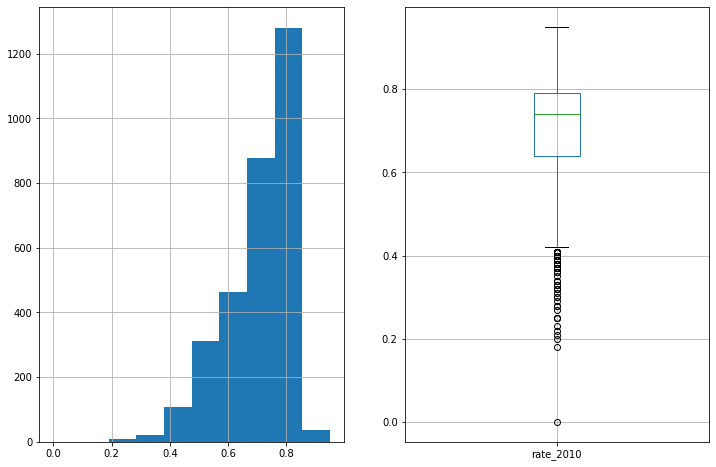

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(12,8))
data['rate_2010'].hist(ax=ax[0])
data.boxplot('rate_2010', ax=ax[1]);

The target variable is not normally distributed but there is variation.

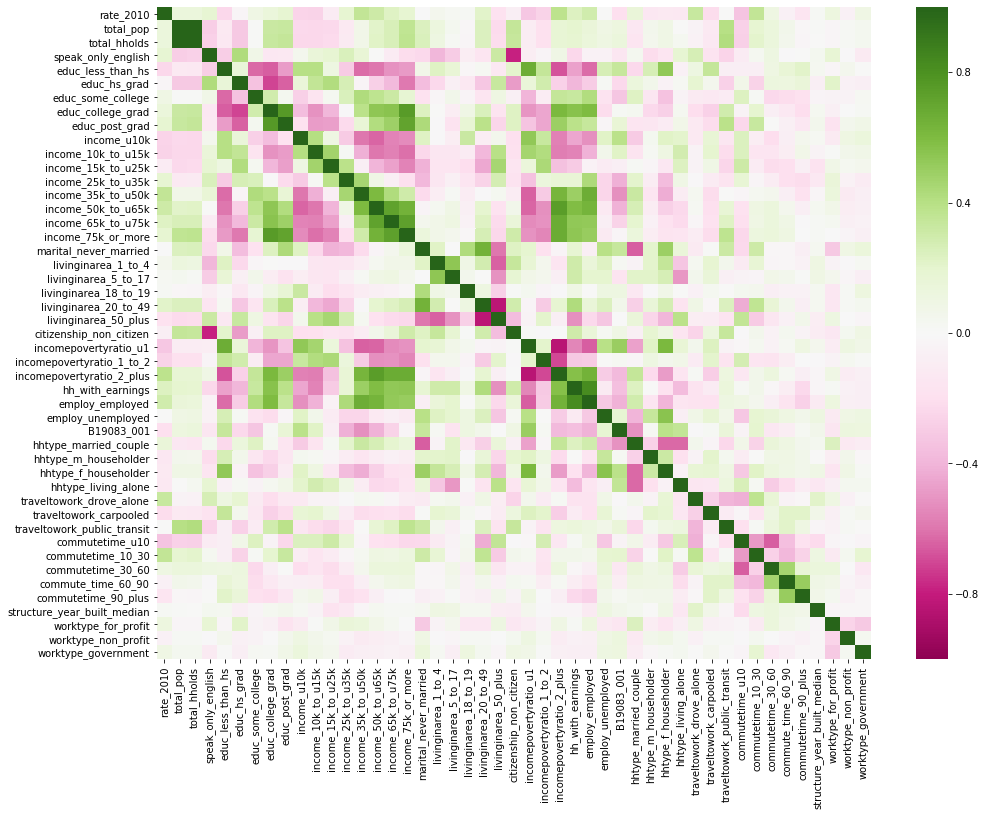

In [14]:
fig, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(data.corr(), cmap='PiYG', vmin=-1, vmax=1, ax=ax);

In [15]:
corrs = data.corr()
corrs['rate_2010'] = corrs['rate_2010'].abs()
corrs.sort_values('rate_2010', ascending=False, inplace=True)
display(corrs['rate_2010'])

rate_2010                     1.000
incomepovertyratio_2_plus     0.378
income_35k_to_u50k            0.354
commutetime_10_30             0.353
commutetime_u10               0.334
traveltowork_drove_alone      0.331
incomepovertyratio_u1         0.318
income_50k_to_u65k            0.307
employ_employed               0.292
incomepovertyratio_1_to_2     0.265
income_10k_to_u15k            0.260
income_u10k                   0.256
hh_with_earnings              0.242
educ_less_than_hs             0.238
income_65k_to_u75k            0.229
livinginarea_20_to_49         0.213
traveltowork_carpooled        0.212
B19083_001                    0.196
income_25k_to_u35k            0.194
income_75k_or_more            0.193
educ_post_grad                0.189
livinginarea_50_plus          0.184
speak_only_english            0.184
commutetime_90_plus           0.151
hhtype_married_couple         0.150
educ_college_grad             0.146
total_pop                     0.137
hhtype_m_householder        

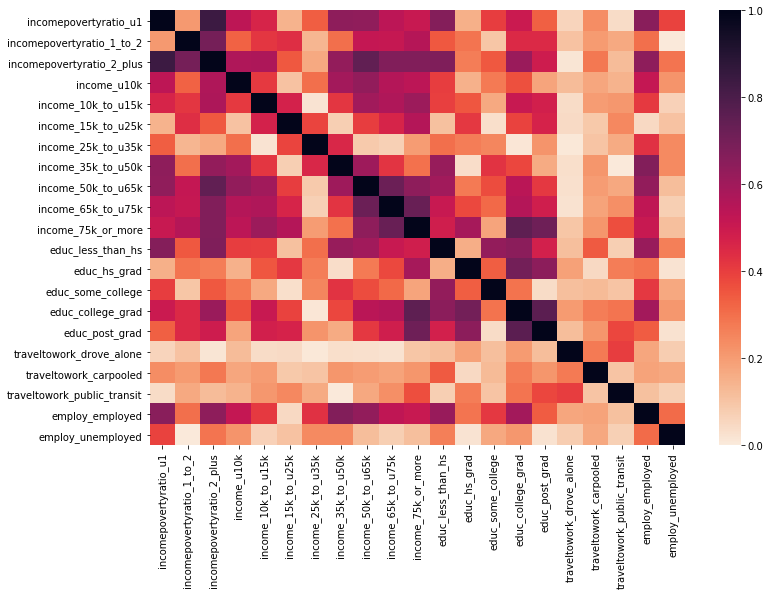

In [16]:
prefixes = ['incomepovertyratio', 'income', 'educ', 'traveltowork', 'employ']
cols = []
for p in prefixes:
    cols = cols + [x for x in list(data.columns) if '{}_'.format(p) in x]
corrs = data[cols].corr().abs()

fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(corrs, vmin=0, vmax=1, ax=ax, cmap=sns.cm.rocket_r);


Correlation between the features and the target variable is surprisingly low.  Income is most correlated, followed by commute, travel time and employment.  These variables are mid to highly correlated with each other.

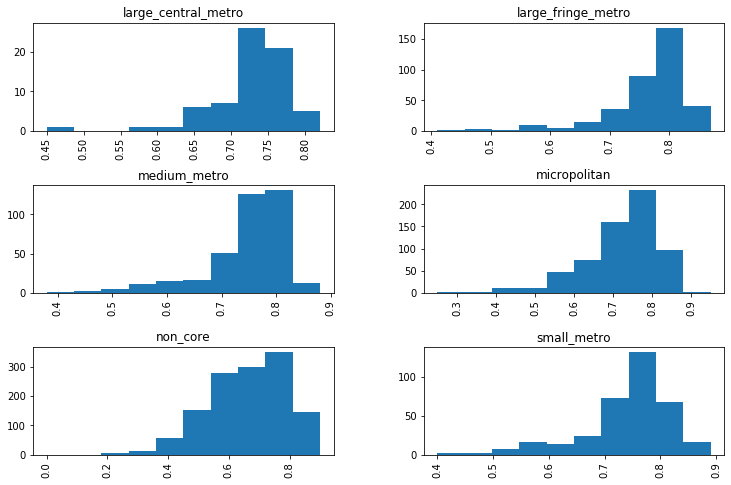

In [17]:
data['rate_2010'].hist(by=data['urbanity'], figsize=(12, 8));

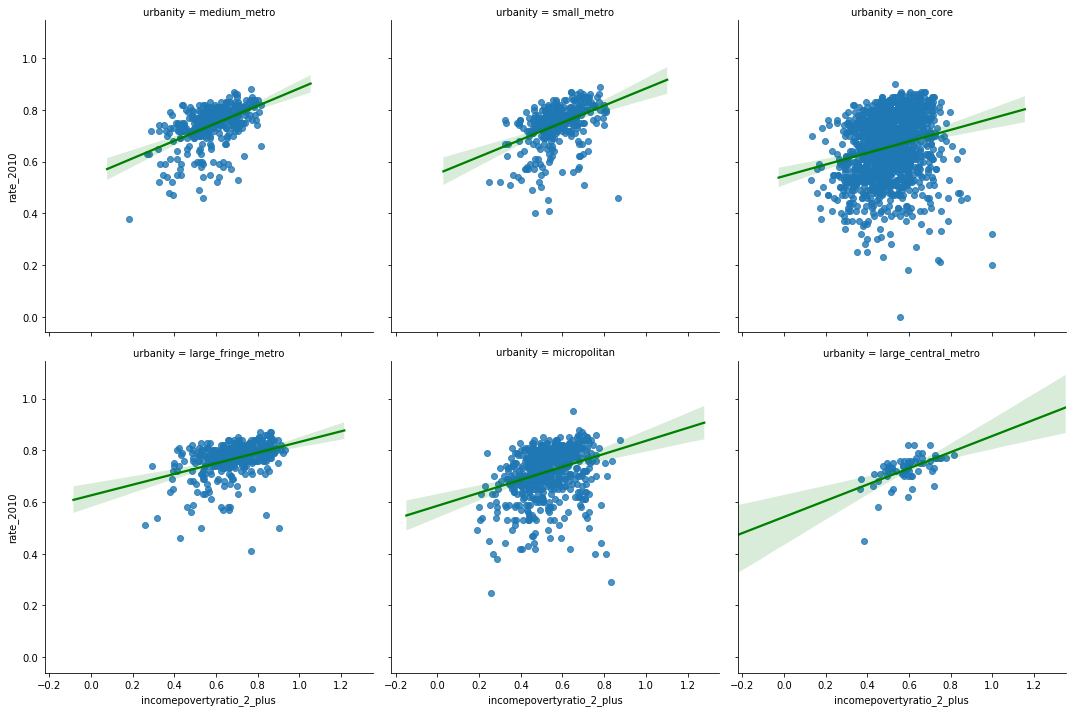

In [18]:
sns.lmplot(x='incomepovertyratio_2_plus', y='rate_2010', col='urbanity', data=data, col_wrap=3, line_kws={'color': 'green'});

There are some differences in the target variable by urbanity.  And potentially some differences in the relationship between income to poverty ratio and the target variable.

### Summary of Preliminary Findings

There are few missing values in these data.  They are concentrated in Puerto Rico, which is handled separately in the ACS data, and in very small counties.  After dropping these observations I have nearly the entire population of counties in the US so no further sampling should be required.


The target variable is a rate from 0-1.  Although it is not normally distributed there is variation that the model can try to predict.  It may also be helpful to identify the counties that were identified as outliers in the boxplot, as they have the lowest participation rates.

No single feature is highly correlated with the target variable.  There is high collinearity among a number of the features which will have to be addressed in the modeling stage.  I may pull additional variables from the raw ACS data if the current feature set performs poorly.

### Next Steps

1. Additional feature construction
    * Leave one out for groups of categorical variables, such as educ_*
    * Build dummies for categorical urbanity field
    * Address multicollinearity in the features (i.e. build interaction terms, leave some out)
2. Pull additional features from the raw ACS data, as needed
3. Create a representative holdout test set
4. Build and evaluate models on the training data
5. Evaluate best model(s) on the holdout set